In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv("updated_file_r.csv")

In [2]:
df.head()

,event_id,event_time,location,rock_type,depth,compressive_strength,tensile_strength,tangential_stress,brittleness_ratio,elastic_strain_energy,...,peak_ground_acceleration,gutenberg_richter_b,cumulative_seismic_energy,axial_stress,radial_stress,strain_rate,intensity_label,seismic_pulses,total_seismic_energy,rockburst_grade
0,RB01502,7/11/2025 21:56,Reko Diq Zone 3,Limestone,621,117.8,11.8,88.4,3.70,3.00,...,0.80,0.92,364.0,93.3,78.3,0.0044,II,48.0,15180.0,2.0
1,RB02587,7/22/2025 13:56,Mansehra Mid Tunnel,Sandstone,772,114.5,10.1,96.9,2.70,2.90,...,0.88,1.01,376.1,98.3,78.8,0.0048,III,33.0,14720.0,1.0
2,RB02654,1/13/2025 16:50,Karak Tunnel,Shale,775,107.0,8.1,94.4,2.59,3.06,...,0.88,1.14,373.0,105.0,82.1,0.0046,III,30.0,8050.0,1.0
3,RB01056,11/17/2025 16:59,Mine X-Delta,Andesite,544,135.5,13.5,78.3,2.59,3.10,...,0.63,1.16,344.1,87.7,70.7,0.0038,I,171.0,28820.0,2.0
4,RB00706,5/19/2025 15:45,Makran Fault Shaft,Chalk,586,130.2,13.9,78.5,2.73,2.59,...,0.63,0.91,331.8,86.7,71.4,0.0038,I,57.0,12640.0,2.0


# "intensity_label" ius the target feature

In [4]:
df.isnull().sum()

event_id                       0
event_time                     0
location                       0
rock_type                      0
depth                          0
compressive_strength           0
tensile_strength               0
tangential_stress              0
brittleness_ratio              0
elastic_strain_energy          0
density                        0
signal_energy                  0
event_duration                 0
dominant_frequency             0
signal_rms                     0
seismic_event_rate             0
peak_ground_acceleration       0
gutenberg_richter_b            0
cumulative_seismic_energy      0
axial_stress                   0
radial_stress                  0
strain_rate                    0
intensity_label                0
seismic_pulses               422
total_seismic_energy         422
rockburst_grade                0
dtype: int64

In [3]:
df.columns

Index(['event_id', 'event_time', 'location', 'rock_type', 'depth',
       'compressive_strength', 'tensile_strength', 'tangential_stress',
       'brittleness_ratio', 'elastic_strain_energy', 'density',
       'signal_energy', 'event_duration', 'dominant_frequency', 'signal_rms',
       'seismic_event_rate', 'peak_ground_acceleration', 'gutenberg_richter_b',
       'cumulative_seismic_energy', 'axial_stress', 'radial_stress',
       'strain_rate', 'intensity_label', 'seismic_pulses',
       'total_seismic_energy', 'rockburst_grade'],
      dtype='object')

In [17]:
df['location'].value_counts()

location
Thar Block A              168
Mansehra Mid Tunnel       165
Reko Diq Zone 3           159
Gawadar Support Shaft     157
Karak Tunnel              155
Punjab Core Tunnel        154
Buner Basin Tunnel        154
Sindh Line A              153
Mine X-Delta              152
Khewra Drift              151
Qasim Tunnel              151
Gilgit Drift Alpha        149
Makran Fault Shaft        149
Tunnel B-12               149
Dir Valley Route          147
Attock Rock Shaft         145
Kohat Underground         143
Skardu Access Tunnel      142
Sanghar Section 1         132
Balochistan Deep Shaft    125
Name: count, dtype: int64

In [24]:
df['event_time'].isnull().sum()

np.int64(0)

In [25]:
df['event_time'].value_counts()

event_time
11/28/2018 0:13     1
7/11/2025 21:56     1
7/22/2025 13:56     1
1/13/2025 16:50     1
11/17/2025 16:59    1
                   ..
2/4/2025 15:57      1
5/31/2025 11:30     1
8/29/2025 11:10     1
1/29/2025 5:50      1
2/27/2025 1:02      1
Name: count, Length: 3000, dtype: int64

In [31]:
df['intensity_label'].value_counts()

intensity_label
II     766
I      758
IV     747
III    729
Name: count, dtype: int64

# Means that 'location' and 'rock_type' both are categorical and remaining are numerical
# Also target feature which is "intensity_label"

In [47]:
df['intensity_label'].dtype

dtype('O')

In [49]:
df['intensity_label'].value_counts()

intensity_label
II     766
I      758
IV     747
III    729
Name: count, dtype: int64

In [5]:
# Define the correct severity order (I < II < III < IV)
intensity_order = {'I': 0, 'II': 1, 'III': 2, 'IV': 3}

# Apply mapping to target column
df['intensity_label'] = df['intensity_label'].map(intensity_order)

# Verify counts
print(df['intensity_label'].value_counts())

intensity_label
1    766
0    758
3    747
2    729
Name: count, dtype: int64


In [7]:
df.head()

,event_id,event_time,location,rock_type,depth,compressive_strength,tensile_strength,tangential_stress,brittleness_ratio,elastic_strain_energy,...,peak_ground_acceleration,gutenberg_richter_b,cumulative_seismic_energy,axial_stress,radial_stress,strain_rate,intensity_label,seismic_pulses,total_seismic_energy,rockburst_grade
0,RB01502,7/11/2025 21:56,Reko Diq Zone 3,Limestone,621,117.8,11.8,88.4,3.70,3.00,...,0.80,0.92,364.0,93.3,78.3,0.0044,1,48.0,15180.0,2.0
1,RB02587,7/22/2025 13:56,Mansehra Mid Tunnel,Sandstone,772,114.5,10.1,96.9,2.70,2.90,...,0.88,1.01,376.1,98.3,78.8,0.0048,2,33.0,14720.0,1.0
2,RB02654,1/13/2025 16:50,Karak Tunnel,Shale,775,107.0,8.1,94.4,2.59,3.06,...,0.88,1.14,373.0,105.0,82.1,0.0046,2,30.0,8050.0,1.0
3,RB01056,11/17/2025 16:59,Mine X-Delta,Andesite,544,135.5,13.5,78.3,2.59,3.10,...,0.63,1.16,344.1,87.7,70.7,0.0038,0,171.0,28820.0,2.0
4,RB00706,5/19/2025 15:45,Makran Fault Shaft,Chalk,586,130.2,13.9,78.5,2.73,2.59,...,0.63,0.91,331.8,86.7,71.4,0.0038,0,57.0,12640.0,2.0


Feature Importance from Random Forest:
                      Feature  Importance
3           tangential_stress    0.177873
1        compressive_strength    0.173935
14  cumulative_seismic_energy    0.141766
11         seismic_event_rate    0.130155
0                       depth    0.125203
12   peak_ground_acceleration    0.082513
7               signal_energy    0.077374
17                strain_rate    0.043853
16              radial_stress    0.023397
15               axial_stress    0.016946
2            tensile_strength    0.006562
18             seismic_pulses    0.000145
5       elastic_strain_energy    0.000080
9          dominant_frequency    0.000064
4           brittleness_ratio    0.000045
19       total_seismic_energy    0.000028
6                     density    0.000023
20            rockburst_grade    0.000022
13        gutenberg_richter_b    0.000012
8              event_duration    0.000003
10                 signal_rms    0.000002


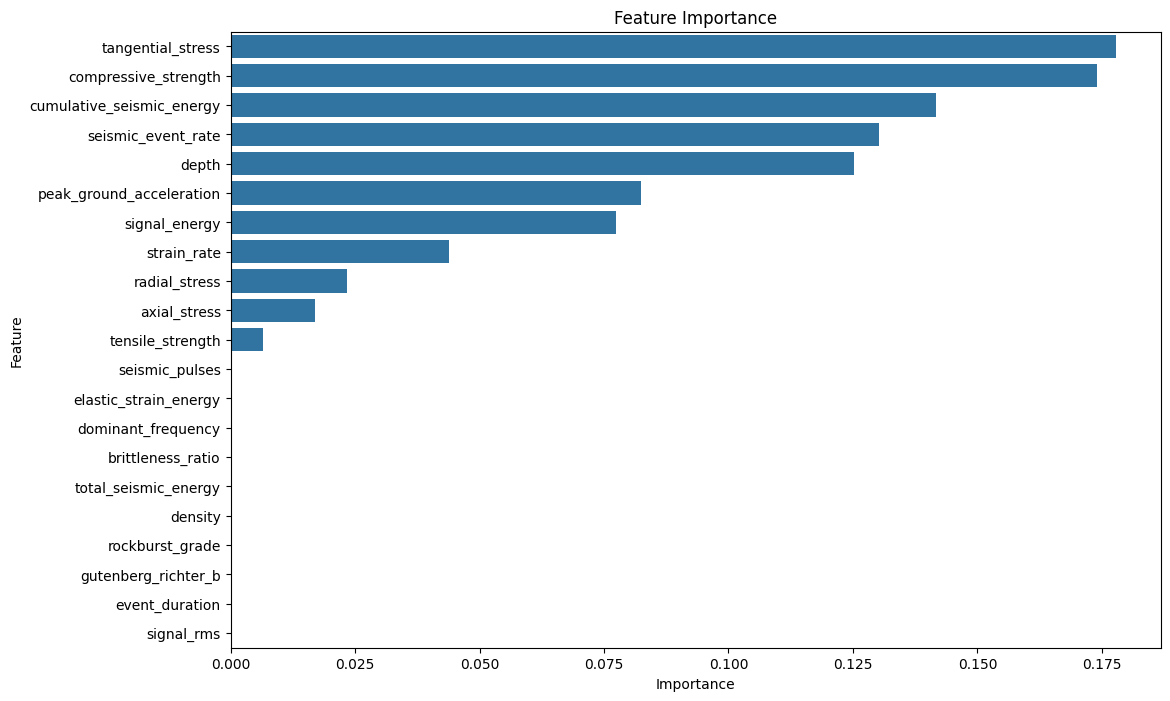

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data
X = df.drop(['intensity_label' , 'location' , 'rock_type' , 'event_id' , 'event_time'], axis=1)
y = df['intensity_label']

# Train random forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("Feature Importance from Random Forest:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance")
plt.show()

In [8]:
df.head(1)

,event_id,event_time,location,rock_type,depth,compressive_strength,tensile_strength,tangential_stress,brittleness_ratio,elastic_strain_energy,...,peak_ground_acceleration,gutenberg_richter_b,cumulative_seismic_energy,axial_stress,radial_stress,strain_rate,intensity_label,seismic_pulses,total_seismic_energy,rockburst_grade
0,RB01502,7/11/2025 21:56,Reko Diq Zone 3,Limestone,621,117.8,11.8,88.4,3.7,3.0,...,0.8,0.92,364.0,93.3,78.3,0.0044,1,48.0,15180.0,2.0


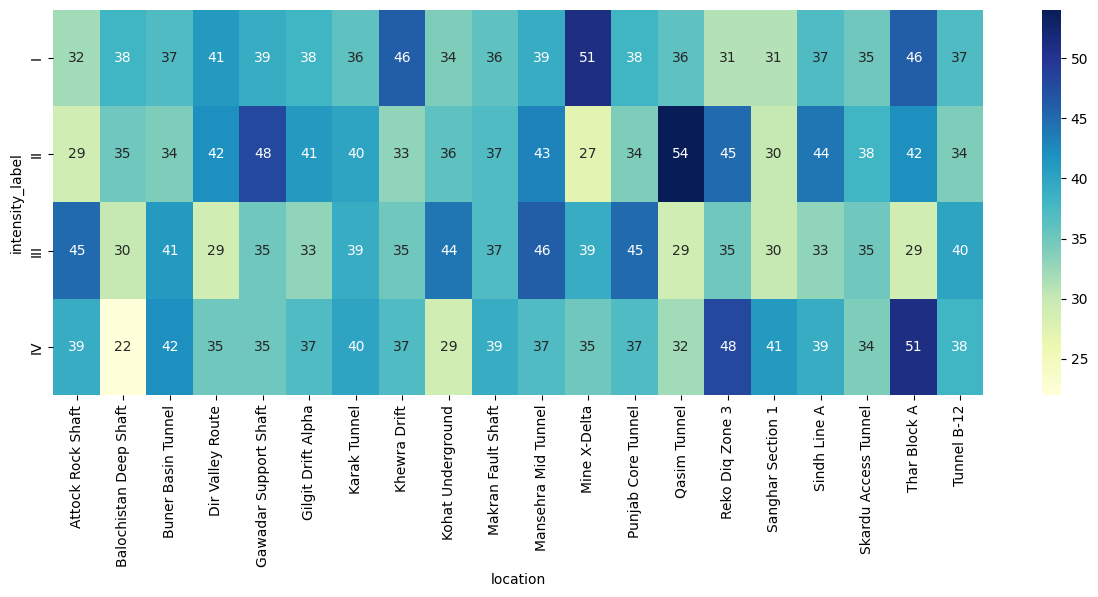

In [20]:
plt.figure(figsize=(15, 5))
# Convert to a frequency table
heatmap_data = pd.crosstab(df["intensity_label"] , df["location"])

# Plot heatmap
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

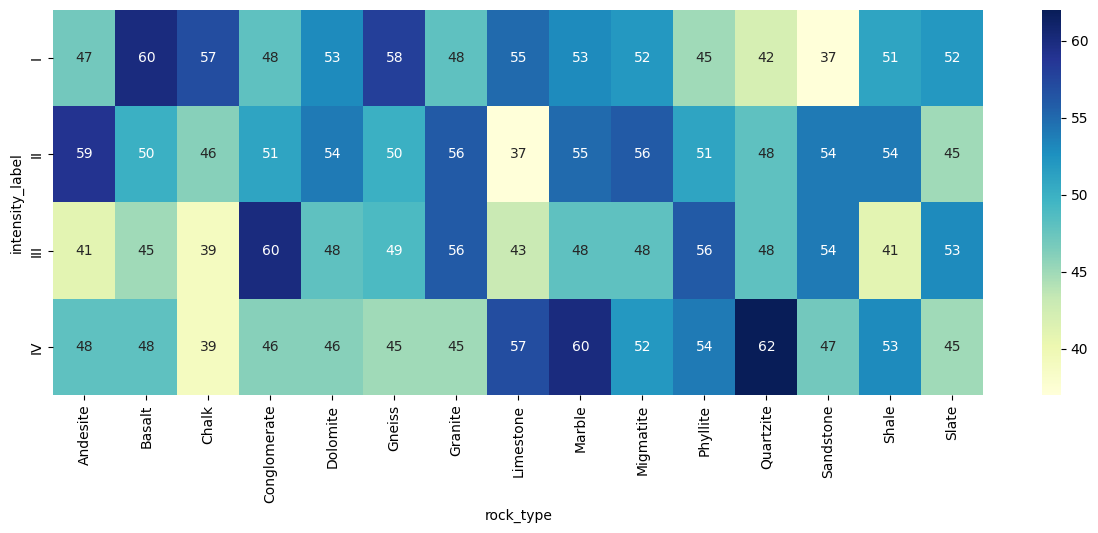

In [21]:
plt.figure(figsize=(15, 5))
# Convert to a frequency table
heatmap_data = pd.crosstab(df["intensity_label"] , df["rock_type"])

# Plot heatmap
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.show()